# Testing NeuroM API for morphology
# To download neuron files : https://neuroinformatics.nl/HBP/morphology-viewer/

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import neurom as nm
from neurom import viewer
from tqdm import tqdm

In [4]:
morpho_path = '../morphologies/Scnn1a-Tg2-Cre.swc'
neuron = nm.load_neuron(morpho_path)

# Visualisation

## Single dendritic tree

Visualizing...: 100%|██████████| 411/411 [00:00<00:00, 966.45it/s]


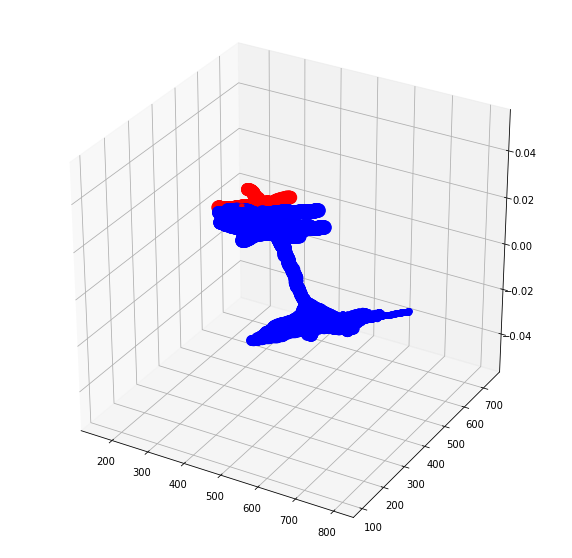

In [19]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d')
for pts in tqdm(neuron.neurites[0].points, 'Visualizing...') :
    plt.scatter(pts[0], pts[1], pts[2], c = 'b')

## Whole neuron

Visualizing...: 100%|██████████| 5179/5179 [00:05<00:00, 929.22it/s]


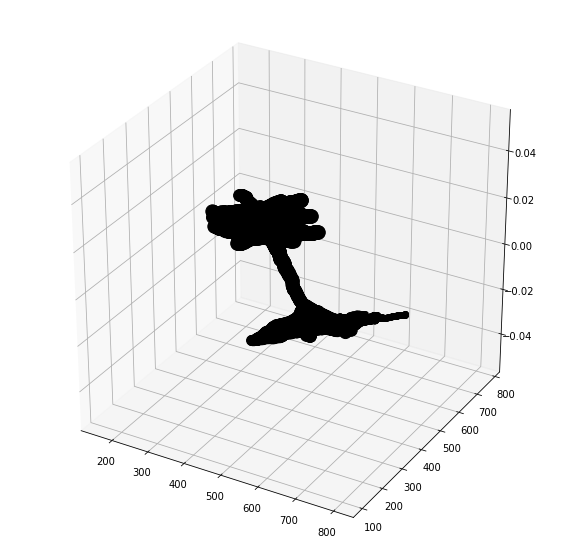

In [12]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d')
for pts in tqdm(neuron.points, 'Visualizing...') :
    plt.scatter(pts[0], pts[1], pts[2], c = 'k')

# Counting the volume in a voxel

In [1]:
vox_resolution = 1

In [10]:
np.round(neuron.neurites[0].points[2][:3],0)

array([269., 636., 185.])

In [32]:
@jit(nopython=True)
def ray_tracing(x,y,poly):
    n = len(poly)
    inside = False
    p2x = 0.0
    p2y = 0.0
    xints = 0.0
    p1x,p1y = poly[0]
    for i in range(n+1):
        p2x,p2y = poly[i % n]
        if y > min(p1y,p2y):
            if y <= max(p1y,p2y):
                if x <= max(p1x,p2x):
                    if p1y != p2y:
                        xints = (y-p1y)*(p2x-p1x)/(p2y-p1y)+p1x
                    if p1x == p2x or x <= xints:
                        inside = not inside
        p1x,p1y = p2x,p2y

    return inside

NameError: name 'jit' is not defined

In [36]:
lenpoly = 4
polygon = [[np.sin(x)+0.5,np.cos(x)+0.5] for x in np.linspace(0,2*np.pi,lenpoly)[:-1]]

In [37]:
polygon

[[0.5, 1.5],
 [1.3660254037844388, 2.220446049250313e-16],
 [-0.3660254037844384, -4.440892098500626e-16]]